# Malis Project
## La Liga Predictions

### Briefing

This project will try to predict the winner between two different football teams, based on the database containing the results and parameters from the Spanish League "La Liga", from both the 2020-2021 and 2021-2022 period. The database features are as follows:

Player = Full name of the player

"#" = Shirt Number.

Nation = Nationality of the player

Pos = Position played in the match

Age = Age on date of the match (YY-DDD)

Min = Minutes Played

Gls = Goals Scored or allowed

Ast = Assists

PK = Penalty kicks made

PKatt = Penalty kicks attempted

Sh = Shots total (does not include penalty kicks)

SoT = Shots on target (does not include penalty kicks)

CrdY = Yellow cards

CrdR = Red cards

Touches = # of times the player touched the ball

Press = # of times applied pressure to opposing player who is receiving, carrying or releasing the ball

Tkl = # of players tackled

Int = Interceptions

Blocks = # of times blocking the ball by standing on its path

xG = Expected goals (include penalty kicks but don't include penalty shootouts)

npxG = Non-penalty expected goals

xA = xG Assisted (xG which follows a pass that assists a shot)

SCA = Shot creating actions

GCA = Goal creating actions

Cmp = Passes completed

Att = Passes attempted

Cmp% = Pass completition percentage

Prog = Progressive passes

Carries = # of times the player controlled the ball with their feet

Prog.1 = Progressive Passes

Succ = Dribbles completed Successfully

Att.1 = Dribbles attempted

Team = Name of the team

Opponent_Team = Name of the oponent team

Match = Lineup of the team's names for that particular match

Date = Date of the encounter

Stadium = Hosting stadium for the match

Crowd = # of spectators on the stadium

## Exploratory data analysis

In [2]:
#Importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Just in case
import warnings
warnings.filterwarnings("ignore")


#Importing both files and merging them as a singular dataframe (DF)
dfx = pd.read_excel("season2021-2022Spain.xlsx")
# dfy = pd.read_excel("season2021-2022Spain.xlsx")
# frames = [dfx, dfy]
# df = pd.concat(frames)
df = dfx
df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

#Visualizing the information of the raw DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         5376 non-null   object 
 1   #              5052 non-null   float64
 2   Nation         5052 non-null   object 
 3   Pos            5052 non-null   object 
 4   Age            5052 non-null   object 
 5   Min            5370 non-null   float64
 6   Gls            5376 non-null   int64  
 7   Ast            5376 non-null   int64  
 8   PK             5376 non-null   int64  
 9   PKatt          5376 non-null   int64  
 10  Sh             5376 non-null   int64  
 11  SoT            5376 non-null   int64  
 12  CrdY           5376 non-null   int64  
 13  CrdR           5376 non-null   int64  
 14  Touches        5305 non-null   float64
 15  Press          5305 non-null   float64
 16  Tkl            5305 non-null   float64
 17  Int            5376 non-null   int64  
 18  Blocks  

In [3]:
#Visualizing the DF head (20 first elements)
df.head(20)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jaime Mata,7.0,es ESP,FW,32-324,59.0,0,0,0,0,...,12.0,1.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
1,Vitolo,8.0,es ESP,"RM,FW",31-315,31.0,0,0,0,0,...,15.0,3.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
2,Enes Ünal,10.0,tr TUR,FW,24-126,59.0,0,0,0,0,...,10.0,1.0,0.0,1.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
3,Sandro Ramírez,12.0,es ESP,FW,26-066,31.0,0,0,0,0,...,17.0,4.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
4,Carles Aleñá,11.0,es ESP,CM,23-251,72.0,0,0,0,0,...,33.0,5.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
5,Jonathan Silva,14.0,ar ARG,LB,27-076,18.0,0,0,0,0,...,13.0,2.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
6,Mauro Arambarri,18.0,uy URU,CM,25-348,31.0,0,0,0,0,...,11.0,2.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
7,David Timor,24.0,es ESP,CM,31-331,59.0,0,0,0,0,...,21.0,2.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
8,Nemanja Maksimović,20.0,rs SRB,"DM,CM",26-230,90.0,0,0,0,0,...,25.0,3.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
9,Jakub Jankto,16.0,cz CZE,"WB,LM",25-237,90.0,0,0,0,0,...,41.0,6.0,1.0,1.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"


In [4]:
#There are some rows that contain NA values (row #16 contains the summed up stats of the team, 
# we will proceed to drop values with NA's)

df = df.dropna()
df.head(20)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jaime Mata,7.0,es ESP,FW,32-324,59.0,0,0,0,0,...,12.0,1.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
1,Vitolo,8.0,es ESP,"RM,FW",31-315,31.0,0,0,0,0,...,15.0,3.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
2,Enes Ünal,10.0,tr TUR,FW,24-126,59.0,0,0,0,0,...,10.0,1.0,0.0,1.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
3,Sandro Ramírez,12.0,es ESP,FW,26-066,31.0,0,0,0,0,...,17.0,4.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
4,Carles Aleñá,11.0,es ESP,CM,23-251,72.0,0,0,0,0,...,33.0,5.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
5,Jonathan Silva,14.0,ar ARG,LB,27-076,18.0,0,0,0,0,...,13.0,2.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
6,Mauro Arambarri,18.0,uy URU,CM,25-348,31.0,0,0,0,0,...,11.0,2.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
7,David Timor,24.0,es ESP,CM,31-331,59.0,0,0,0,0,...,21.0,2.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
8,Nemanja Maksimović,20.0,rs SRB,"DM,CM",26-230,90.0,0,0,0,0,...,25.0,3.0,0.0,0.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"
9,Jakub Jankto,16.0,cz CZE,"WB,LM",25-237,90.0,0,0,0,0,...,41.0,6.0,1.0,1.0,Getafe,Elche,Getafe_vs_Elche,2021-09-13,"Coliseum Alfonso Pérez, Getafe","6,853"


In [5]:
#Visualizing the DF's feature informtion to spot nulls/NA's
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4937 entries, 0 to 5374
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         4937 non-null   object 
 1   #              4937 non-null   float64
 2   Nation         4937 non-null   object 
 3   Pos            4937 non-null   object 
 4   Age            4937 non-null   object 
 5   Min            4937 non-null   float64
 6   Gls            4937 non-null   int64  
 7   Ast            4937 non-null   int64  
 8   PK             4937 non-null   int64  
 9   PKatt          4937 non-null   int64  
 10  Sh             4937 non-null   int64  
 11  SoT            4937 non-null   int64  
 12  CrdY           4937 non-null   int64  
 13  CrdR           4937 non-null   int64  
 14  Touches        4937 non-null   float64
 15  Press          4937 non-null   float64
 16  Tkl            4937 non-null   float64
 17  Int            4937 non-null   int64  
 18  Blocks  

In [6]:
#Regrouping the DF to spot the teams confronting each other
df_versus = df.groupby(["Match","Date","Team","Stadium","Crowd"], as_index=False)["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR","Touches",
                                                         "Press","Tkl", "Int", "Blocks"].sum()

df_versus

#We now need to create an additional column for the results of each encounter (Win/Loss/Draw).

,Match,Date,Team,Stadium,Crowd,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks
0,Alavés_vs_Atlético_Madrid,2021-09-25,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",1,1,0,0,7,1,2,0,390.0,141.0,11.0,8,18.0
1,Alavés_vs_Atlético_Madrid,2021-09-25,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",0,0,0,0,13,1,3,0,728.0,82.0,13.0,6,7.0
2,Alavés_vs_Celta_Vigo,2021-11-27,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz","10,093",1,1,0,0,13,5,3,0,537.0,117.0,9.0,24,16.0
3,Alavés_vs_Celta_Vigo,2021-11-27,Celta Vigo,"Estadio de Mendizorroza, Vitoria-Gasteiz","10,093",2,1,0,1,7,4,2,0,698.0,185.0,13.0,22,17.0
4,Alavés_vs_Elche,2021-10-26,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz","10,206",1,1,0,0,16,5,1,0,483.0,153.0,17.0,17,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Villarreal_vs_Granada,2021-08-16,Villarreal,"Estadio de la Cerámica, Villarreal","7,837",0,0,0,0,14,3,5,1,618.0,139.0,17.0,20,8.0
316,Villarreal_vs_Osasuna,2021-10-17,Osasuna,"Estadio de la Cerámica, Villarreal","14,831",2,1,0,0,6,2,5,0,376.0,228.0,20.0,23,15.0
317,Villarreal_vs_Osasuna,2021-10-17,Villarreal,"Estadio de la Cerámica, Villarreal","14,831",1,1,0,0,11,6,1,0,791.0,82.0,7.0,8,11.0
318,Villarreal_vs_Real_Betis,2021-10-03,Real Betis,"Estadio de la Cerámica, Villarreal","16,719",0,0,0,0,10,3,4,0,556.0,185.0,20.0,15,13.0


In [7]:
#Generating the Label column (Results)

matches = pd.DataFrame(df_versus.Match.drop_duplicates())
matches = matches.reset_index(drop=True)

test = []

for i in matches.Match:
    i = str(i)
    oi = df_versus.loc[df_versus["Match"]==i]
    oi = oi.reset_index(drop=True)
    b = (oi.Gls[0])-(oi.Gls[1]) #Goals - Goals of the other team
    if b < 0:
        a = 0 #Assigned to losers
        b = 1 #Assigned to winners
        test.append(a)
        test.append(b)
    elif b > 0:
        a = 1 #Assigned to winners
        b = 0 #Assigned to losers
        test.append(a)
        test.append(b)
    else:
        a = 2 #Assigned when result is a draw
        b = 2 #Assigned when result is a draw
        test.append(a)
        test.append(b)        

        
test = pd.DataFrame(test)

df_versus["Results"] = test


#Visualizing the DF with the "Results" Column
df_versus.head(25)

,Match,Date,Team,Stadium,Crowd,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,Results
0,Alavés_vs_Atlético_Madrid,2021-09-25,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",1,1,0,0,7,1,2,0,390.0,141.0,11.0,8,18.0,1
1,Alavés_vs_Atlético_Madrid,2021-09-25,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",0,0,0,0,13,1,3,0,728.0,82.0,13.0,6,7.0,0
2,Alavés_vs_Celta_Vigo,2021-11-27,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz","10,093",1,1,0,0,13,5,3,0,537.0,117.0,9.0,24,16.0,0
3,Alavés_vs_Celta_Vigo,2021-11-27,Celta Vigo,"Estadio de Mendizorroza, Vitoria-Gasteiz","10,093",2,1,0,1,7,4,2,0,698.0,185.0,13.0,22,17.0,1
4,Alavés_vs_Elche,2021-10-26,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz","10,206",1,1,0,0,16,5,1,0,483.0,153.0,17.0,17,18.0,1
5,Alavés_vs_Elche,2021-10-26,Elche,"Estadio de Mendizorroza, Vitoria-Gasteiz","10,206",0,0,0,0,4,1,1,0,666.0,145.0,18.0,10,17.0,0
6,Alavés_vs_Levante,2021-11-06,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz","12,176",2,1,1,1,9,2,3,0,587.0,100.0,12.0,11,12.0,1
7,Alavés_vs_Levante,2021-11-06,Levante,"Estadio de Mendizorroza, Vitoria-Gasteiz","12,176",1,1,0,0,12,7,3,0,451.0,101.0,12.0,9,16.0,0
8,Alavés_vs_Mallorca,2021-08-21,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz","2,896",0,0,0,0,9,3,3,1,465.0,120.0,22.0,4,7.0,0
9,Alavés_vs_Mallorca,2021-08-21,Mallorca,"Estadio de Mendizorroza, Vitoria-Gasteiz","2,896",1,1,0,0,12,2,3,0,528.0,107.0,7.0,9,12.0,1


In [8]:
#Adding the Home/Away Column

o = []
for i,j in zip(df_versus.Match,df_versus.Team):
    a = i.split("_vs")
    a = a[0].replace("_"," ")
    if a == j:
        a=1 # 1 is Home
    else:
        a=0 # 0 is Away
    o.append(a)

test = pd.DataFrame(o)
df_versus["Home/Away"] = test

#Visualizing the updated DF
df_versus

,Match,Date,Team,Stadium,Crowd,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,Results,Home/Away
0,Alavés_vs_Atlético_Madrid,2021-09-25,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",1,1,0,0,7,1,2,0,390.0,141.0,11.0,8,18.0,1,1
1,Alavés_vs_Atlético_Madrid,2021-09-25,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",0,0,0,0,13,1,3,0,728.0,82.0,13.0,6,7.0,0,0
2,Alavés_vs_Celta_Vigo,2021-11-27,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz","10,093",1,1,0,0,13,5,3,0,537.0,117.0,9.0,24,16.0,0,1
3,Alavés_vs_Celta_Vigo,2021-11-27,Celta Vigo,"Estadio de Mendizorroza, Vitoria-Gasteiz","10,093",2,1,0,1,7,4,2,0,698.0,185.0,13.0,22,17.0,1,0
4,Alavés_vs_Elche,2021-10-26,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz","10,206",1,1,0,0,16,5,1,0,483.0,153.0,17.0,17,18.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Villarreal_vs_Granada,2021-08-16,Villarreal,"Estadio de la Cerámica, Villarreal","7,837",0,0,0,0,14,3,5,1,618.0,139.0,17.0,20,8.0,2,1
316,Villarreal_vs_Osasuna,2021-10-17,Osasuna,"Estadio de la Cerámica, Villarreal","14,831",2,1,0,0,6,2,5,0,376.0,228.0,20.0,23,15.0,1,0
317,Villarreal_vs_Osasuna,2021-10-17,Villarreal,"Estadio de la Cerámica, Villarreal","14,831",1,1,0,0,11,6,1,0,791.0,82.0,7.0,8,11.0,0,1
318,Villarreal_vs_Real_Betis,2021-10-03,Real Betis,"Estadio de la Cerámica, Villarreal","16,719",0,0,0,0,10,3,4,0,556.0,185.0,20.0,15,13.0,0,0


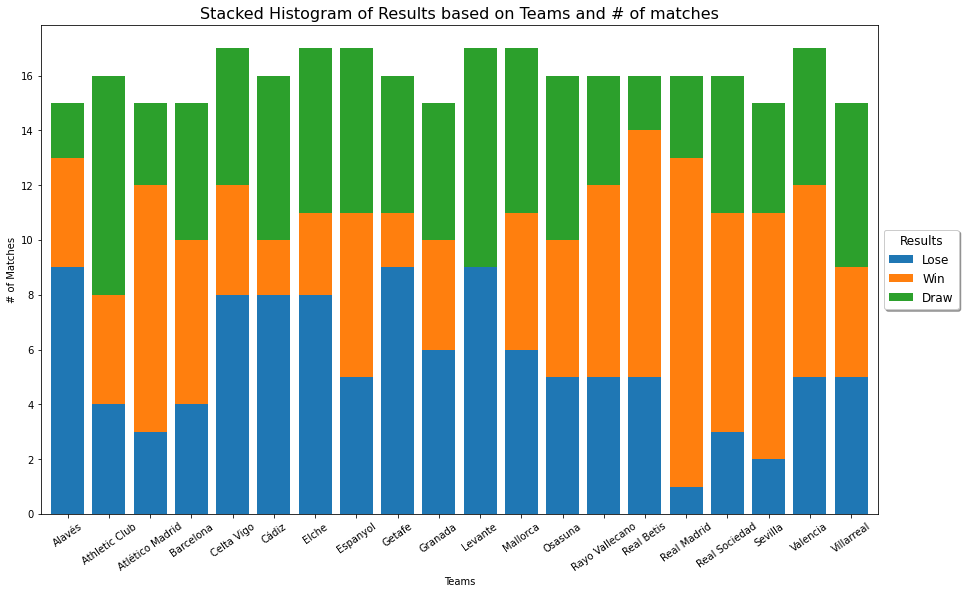

In [9]:
#Visualizing the Stacked Histogram (Using df.plot())
df_plot = df_versus.groupby(["Team", "Results"]).size().reset_index().pivot(columns="Results" , 
                                                                            index="Team", values=0)
df_plot.plot(kind="bar", stacked=True, figsize =(15,9),
rot=35,width=.8)
plt.title("Stacked Histogram of Results based on Teams and # of matches",size=16)
plt.legend(["Lose","Win","Draw"], title="Results",loc="center left",
bbox_to_anchor=(1, 0, 0.5, 1),fontsize = "large",
shadow = True,title_fontsize="large")

plt.xlabel("Teams")
plt.ylabel("# of Matches")
plt.show()


Data Processing : 

In [10]:
# Convert the type of dates from Str to Date : 
from datetime import * 
dates = []
for i in df_versus['Date']:
    date_str = str(i).replace("-","/")
    date_obj = datetime.strptime(date_str, '%Y/%m/%d').date()
    dates.append(date_obj)
df_versus['Date']= pd.DataFrame(np.array(dates))

In [11]:
def average_last_3(feature):
    # do the average of the "feature" in the 3 last matches of the team 
    media = []
    for date, team in zip(df_versus["Date"],df_versus["Team"]):
        oi = df_versus.loc[df_versus["Date"]<date]
        oi = oi.loc[oi["Team"]==team]
        oi= oi.reset_index(drop=True)
        oi = oi[-3:]
        oi = oi[feature].mean()
        media.append(oi)
    df_versus["last_3_avrg_"+feature] = pd.DataFrame(np.array(media))   

def average(feature):
    # do the average of the "feature" in all the matches of the team before the match going to play it
    media = []
    for i, j in zip(df_versus["Date"],df_versus["Team"]):
        oi = df_versus.loc[df_versus["Date"]<i]
        oi = oi.loc[oi["Team"]==j]
        oi = oi[feature].mean()
        media.append(oi)
    df_versus["avrg_"+feature] = pd.DataFrame(np.array(media))


In [12]:
# for each feature, apply the average of the last 3 matches 
features_average = df_versus.drop(columns=['Match','Date','Results','Team','Home/Away','Stadium','Crowd'])

for feature in features_average.columns:
    average_last_3(feature)
    average(feature)

df_versus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match                320 non-null    object 
 1   Date                 320 non-null    object 
 2   Team                 320 non-null    object 
 3   Stadium              320 non-null    object 
 4   Crowd                320 non-null    object 
 5   Gls                  320 non-null    int64  
 6   Ast                  320 non-null    int64  
 7   PK                   320 non-null    int64  
 8   PKatt                320 non-null    int64  
 9   Sh                   320 non-null    int64  
 10  SoT                  320 non-null    int64  
 11  CrdY                 320 non-null    int64  
 12  CrdR                 320 non-null    int64  
 13  Touches              320 non-null    float64
 14  Press                320 non-null    float64
 15  Tkl                  320 non-null    flo

In [13]:
# delete the features for the specefic match 
df_versus = df_versus.drop(columns=["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR",
    "Touches","Press","Tkl", "Int", "Blocks"])
df_versus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match                320 non-null    object 
 1   Date                 320 non-null    object 
 2   Team                 320 non-null    object 
 3   Stadium              320 non-null    object 
 4   Crowd                320 non-null    object 
 5   Results              320 non-null    int64  
 6   Home/Away            320 non-null    int64  
 7   last_3_avrg_Gls      300 non-null    float64
 8   avrg_Gls             300 non-null    float64
 9   last_3_avrg_Ast      300 non-null    float64
 10  avrg_Ast             300 non-null    float64
 11  last_3_avrg_PK       300 non-null    float64
 12  avrg_PK              300 non-null    float64
 13  last_3_avrg_PKatt    300 non-null    float64
 14  avrg_PKatt           300 non-null    float64
 15  last_3_avrg_Sh       300 non-null    flo

In [14]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

clf_random = RandomForestClassifier()
clf_logistic = LogisticRegression()
clf_svm = svm.SVC()
clf_KNN = KNeighborsClassifier()

X = df_versus.drop(columns=['Date','Match','Team','Results','Stadium','Crowd'])
Y = df_versus['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
acc_random = []
acc_KNN = []
acc_logistic = []
acc_svm = []
for i in range(1000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    clf_random.fit(X_train, Y_train)
    y_hat_random = clf_random.predict(X_test)
    acc_random.append(accuracy_score(y_test,y_hat_random)) 

    clf_KNN.fit(X_train, Y_train)
    y_hat_KNN = clf_KNN.predict(X_test)
    acc_KNN.append(accuracy_score(y_test,y_hat_KNN)) 

    clf_logistic.fit(X_train, Y_train)
    y_hat_logistic = clf_logistic.predict(X_test)
    acc_logistic.append(accuracy_score(y_test,y_hat_logistic))

    clf_svm.fit(X_train, Y_train)
    y_hat_svm = clf_svm.predict(X_test)
    acc_svm.append(accuracy_score(y_test,y_hat_svm))  

print("Random Forest : ", np.array(acc_random).mean())
print("KNN : ",np.array(acc_KNN).mean())
print("Logistic Regression : ",np.array(acc_logistic).mean())
print("SVM : ", np.array(acc_svm).mean())




Random Forest :  0.357375
KNN :  0.3336875
logistic :  0.35303125
 svm :  0.37996875


In [15]:
'''
# to correct

matches = pd.DataFrame(df_versus.Match.drop_duplicates())
matches = matches.reset_index(drop=True)
features_average = df_versus.drop(columns=['Match','Date','Results','Team','Home/Away','Stadium','Crowd'])

differences = {}
for i in matches.Match:
    i = str(i)
    oi = df_versus.loc[df_versus["Match"]==i]
    oi = oi.reset_index(drop=True)
    difference = []
    for avg_feature in features_average.columns:
        difference.append(oi[avg_feature][0]-oi[avg_feature][1])
    differences[avg_feature]= difference

for avg_feature, difference in differences.items():
    difference = pd.DataFrame(difference)
    df_versus[avg_feature] = difference

df_versus
'''

'\n# to correct\n\nmatches = pd.DataFrame(df_versus.Match.drop_duplicates())\nmatches = matches.reset_index(drop=True)\nfeatures_average = df_versus.drop(columns=[\'Match\',\'Date\',\'Results\',\'Team\',\'Home/Away\',\'Stadium\',\'Crowd\'])\n\ndifferences = {}\nfor i in matches.Match:\n    i = str(i)\n    oi = df_versus.loc[df_versus["Match"]==i]\n    oi = oi.reset_index(drop=True)\n    difference = []\n    for avg_feature in features_average.columns:\n        difference.append(oi[avg_feature][0]-oi[avg_feature][1])\n    differences[avg_feature]= difference\n\nfor avg_feature, difference in differences.items():\n    difference = pd.DataFrame(difference)\n    df_versus[avg_feature] = difference\n\ndf_versus\n'